In [1]:
import sys

module_dir = '../'

if module_dir not in sys.path:
    sys.path.append(module_dir)

import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from models import *
import test_systems_1d as systems_1d
import itertools
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import NoNorm
from tqdm import tqdm
import gpjax as gpx
import jax.random as jr
import jax.numpy as jnp

/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


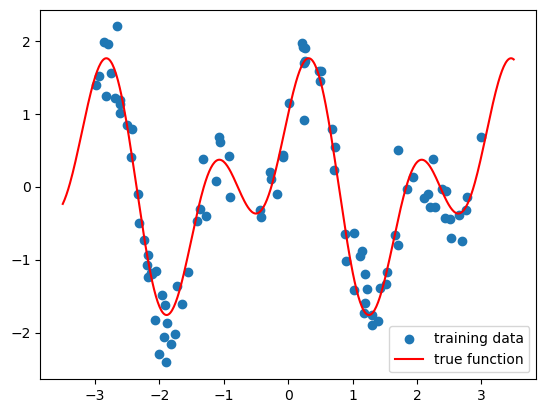

In [2]:
# generate training and testing data

key = jr.key(123)

n = 100
noise = 0.3

key, subkey = jr.split(key)
x = jr.uniform(key=key, minval=-3.0, maxval=3.0, shape=(n,)).reshape(-1, 1)
f = lambda x: jnp.sin(4 * x) + jnp.cos(2 * x)
signal = f(x)
y = signal + jr.normal(subkey, shape=signal.shape) * noise

# testing data

xtest = jnp.linspace(-3.5, 3.5, 500).reshape(-1, 1)
ytest = f(xtest)

plt.figure()
plt.scatter(x, y, label='training data')
plt.plot(xtest, ytest, 'r', label='true function')
plt.legend()
plt.show()

Prior(kernel=RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(1., dtype=float32, weak_type=True), variance=Array(1., dtype=float32, weak_type=True)), mean_function=Zero(constant=Array([0.], dtype=float32)), jitter=1e-06)
RBF(compute_engine=DenseKernelComputation(), active_dims=None, name='RBF', lengthscale=Array(1., dtype=float32, weak_type=True), variance=Array(1., dtype=float32, weak_type=True))
Zero(constant=Array([0.], dtype=float32))
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

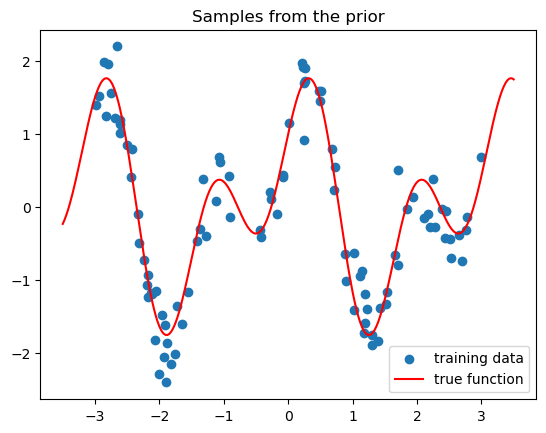

In [5]:
# generate samples from the prior

model = GP_regressor()
print(model.kernel)
print(model.mean_function)
prior_samples = model.sample_prior(key, xtest, n_samples=10)
print(prior_samples) ### WHY AM I GETTING NANs?

plt.figure()
plt.scatter(x, y, label='training data')
plt.plot(xtest, ytest, 'r', label='true function')
plt.plot(xtest, prior_samples.T, color='tab:blue', alpha=0.5)
plt.title('Samples from the prior')
plt.legend()
plt.show()